# ETL Operations Using Python

In [163]:
# !pip install pymysql
import mysql.connector as sql
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
# Task 1
db=sql.connect(host='localhost',user='root',password='Sukrit_1996',database='hr')
a=db.cursor()

In [165]:
q='show tables'
a.execute(q)
for i in a:
    print(i)

('countries',)
('departments',)
('emp_details_view',)
('employees',)
('job_history',)
('jobs',)
('locations',)
('regions',)


In [166]:
q1='describe employees'
a.execute(q1)
for i in a:
    print(i)

('employee_id', b'int unsigned', 'NO', 'PRI', None, '')
('first_name', b'varchar(20)', 'YES', '', None, '')
('last_name', b'varchar(25)', 'NO', '', None, '')
('email', b'varchar(25)', 'NO', '', None, '')
('phone_number', b'varchar(20)', 'YES', '', None, '')
('hire_date', b'date', 'NO', '', None, '')
('job_id', b'varchar(10)', 'NO', 'MUL', None, '')
('salary', b'decimal(8,2)', 'NO', '', None, '')
('commission_pct', b'decimal(2,2)', 'YES', '', None, '')
('manager_id', b'int unsigned', 'YES', 'MUL', None, '')
('department_id', b'int unsigned', 'YES', 'MUL', None, '')
('annual_CTC', b'int', 'NO', '', None, '')


In [167]:
q2='describe countries'
a.execute(q2)
for i in a:
    print(i)

('country_id', b'char(2)', 'NO', 'PRI', None, '')
('country_name', b'varchar(40)', 'YES', '', None, '')
('region_id', b'int unsigned', 'NO', 'MUL', None, '')


In [168]:
q3='describe locations'
a.execute(q3)
for i in a:
    print(i)

('location_id', b'int unsigned', 'NO', 'PRI', None, 'auto_increment')
('street_address', b'varchar(40)', 'YES', '', None, '')
('postal_code', b'varchar(12)', 'YES', '', None, '')
('city', b'varchar(30)', 'NO', '', None, '')
('state_province', b'varchar(25)', 'YES', '', None, '')
('country_id', b'char(2)', 'NO', 'MUL', None, '')


In [169]:
q4='describe departments'
a.execute(q4)
for i in a:
    print(i)

('department_id', b'int unsigned', 'NO', 'PRI', None, '')
('department_name', b'varchar(30)', 'NO', '', None, '')
('manager_id', b'int unsigned', 'YES', 'MUL', None, '')
('location_id', b'int unsigned', 'YES', 'MUL', None, '')


In [170]:
q5='select * from employees e left join departments d on e.department_id=d.department_id left join locations l on d.location_id=l.location_id left join countries c on l.country_id=c.country_id'
a.execute(q5)
d=a.fetchall()
for i in d:
    print(i)

(100, 'Steven', 'King', 'SKING', '515.123.4567', datetime.date(1987, 6, 17), 'AD_PRES', Decimal('25200.00'), None, None, 90, 302400, 90, 'Executive', 100, 1700, 1700, '2004 Charade Rd', '98199', 'Seattle', 'Washington', 'US', 'US', 'United States of America', 2)
(101, 'Neena', 'Kochhar', 'NKOCHHAR', '515.123.4568', datetime.date(1989, 9, 21), 'AD_VP', Decimal('18700.00'), None, 100, 90, 224400, 90, 'Executive', 100, 1700, 1700, '2004 Charade Rd', '98199', 'Seattle', 'Washington', 'US', 'US', 'United States of America', 2)
(102, 'Lex', 'De Haan', 'LDEHAAN', '515.123.4569', datetime.date(1993, 1, 13), 'AD_VP', Decimal('18700.00'), None, 100, 90, 224400, 90, 'Executive', 100, 1700, 1700, '2004 Charade Rd', '98199', 'Seattle', 'Washington', 'US', 'US', 'United States of America', 2)
(103, 'Alexander', 'Hunold', 'AHUNOLD', '590.423.4567', datetime.date(1990, 1, 3), 'IT_PROG', Decimal('11880.00'), None, 102, 60, 142560, 60, 'IT', 103, 1400, 1400, '2014 Jabberwocky Rd', '26192', 'Southlake', 

In [171]:
df=pd.DataFrame(d)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,25200.00,None,NaN,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,18700.00,None,100.0,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,1993-01-13,AD_VP,18700.00,None,100.0,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,1990-01-03,IT_PROG,11880.00,None,102.0,...,1400.0,1400.0,2014 Jabberwocky Rd,26192,Southlake,Texas,US,US,United States of America,2.0
4,104,Bruce,Ernst,BERNST,590.423.4568,1991-05-21,IT_PROG,7200.00,None,103.0,...,1400.0,1400.0,2014 Jabberwocky Rd,26192,Southlake,Texas,US,US,United States of America,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,1997-08-17,MK_REP,7200.00,None,201.0,...,1800.0,1800.0,147 Spadina Ave,M5V 2L7,Toronto,Ontario,CA,CA,Canada,2.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,1994-06-07,HR_REP,7800.00,None,101.0,...,2400.0,2400.0,8204 Arthur St,None,London,None,UK,UK,United Kingdom,1.0
104,204,Hermann,Baer,HBAER,515.123.8888,1994-06-07,PR_REP,13200.00,None,101.0,...,2700.0,2700.0,Schwanthalerstr. 7031,80925,Munich,Bavaria,DE,DE,Germany,1.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,1994-06-07,AC_MGR,15840.00,None,101.0,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0


In [172]:
q6=pd.read_sql_query(q5,db)
q6

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,...,location_id,location_id,street_address,postal_code,city,state_province,country_id,country_id,country_name,region_id
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,25200.0,NaN,NaN,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,18700.0,NaN,100.0,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,1993-01-13,AD_VP,18700.0,NaN,100.0,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,1990-01-03,IT_PROG,11880.0,NaN,102.0,...,1400.0,1400.0,2014 Jabberwocky Rd,26192,Southlake,Texas,US,US,United States of America,2.0
4,104,Bruce,Ernst,BERNST,590.423.4568,1991-05-21,IT_PROG,7200.0,NaN,103.0,...,1400.0,1400.0,2014 Jabberwocky Rd,26192,Southlake,Texas,US,US,United States of America,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,1997-08-17,MK_REP,7200.0,NaN,201.0,...,1800.0,1800.0,147 Spadina Ave,M5V 2L7,Toronto,Ontario,CA,CA,Canada,2.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,1994-06-07,HR_REP,7800.0,NaN,101.0,...,2400.0,2400.0,8204 Arthur St,None,London,None,UK,UK,United Kingdom,1.0
104,204,Hermann,Baer,HBAER,515.123.8888,1994-06-07,PR_REP,13200.0,NaN,101.0,...,2700.0,2700.0,Schwanthalerstr. 7031,80925,Munich,Bavaria,DE,DE,Germany,1.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,1994-06-07,AC_MGR,15840.0,NaN,101.0,...,1700.0,1700.0,2004 Charade Rd,98199,Seattle,Washington,US,US,United States of America,2.0


In [173]:
# Task 2
q7=pd.read_sql_query('Select * from employees',db)
print(q7)
print(type(q7))

     employee_id first_name last_name     email    phone_number   hire_date  \
0            100     Steven      King     SKING    515.123.4567  1987-06-17   
1            101      Neena   Kochhar  NKOCHHAR    515.123.4568  1989-09-21   
2            102        Lex   De Haan   LDEHAAN    515.123.4569  1993-01-13   
3            103  Alexander    Hunold   AHUNOLD    590.423.4567  1990-01-03   
4            104      Bruce     Ernst    BERNST    590.423.4568  1991-05-21   
..           ...        ...       ...       ...             ...         ...   
102          202        Pat       Fay      PFAY    603.123.6666  1997-08-17   
103          203      Susan    Mavris   SMAVRIS    515.123.7777  1994-06-07   
104          204    Hermann      Baer     HBAER    515.123.8888  1994-06-07   
105          205    Shelley   Higgins  SHIGGINS    515.123.8080  1994-06-07   
106          206    William     Gietz    WGIETZ  51hr5.123.8181  1994-06-07   

         job_id   salary  commission_pct  manager_i

In [174]:
q8=pd.read_sql_query('select * from departments',db)
print(q8)
print(type(q8))

    department_id       department_name  manager_id  location_id
0              10        Administration       200.0         1700
1              20             Marketing       201.0         1800
2              30            Purchasing       114.0         1700
3              40       Human Resources       203.0         2400
4              50              Shipping       121.0         1500
5              60                    IT       103.0         1400
6              70      Public Relations       204.0         2700
7              80                 Sales       145.0         2500
8              90             Executive       100.0         1700
9             100               Finance       108.0         1700
10            110            Accounting       205.0         1700
11            120              Treasury         NaN         1700
12            130         Corporate Tax         NaN         1700
13            140    Control And Credit         NaN         1700
14            150  Shareh

In [175]:
q9=pd.read_sql_query('select * from locations',db)
print(q9)
print(type(q9))

    location_id                            street_address  postal_code  \
0          1000                      1297 Via Cola di Rie        00989   
1          1100                   93091 Calle della Testa        10934   
2          1200                          2017 Shinjuku-ku         1689   
3          1300                           9450 Kamiya-cho         6823   
4          1400                       2014 Jabberwocky Rd        26192   
5          1500                       2011 Interiors Blvd        99236   
6          1600                            2007 Zagora St        50090   
7          1700                           2004 Charade Rd        98199   
8          1800                           147 Spadina Ave      M5V 2L7   
9          1900                           6092 Boxwood St      YSW 9T2   
10         2000                       40-5-12 Laogianggen       190518   
11         2100                        1298 Vileparle (E)       490231   
12         2200                     12

In [176]:
q10=pd.read_sql_query('select * from countries',db)
print(q10)
print(type(q10))

   country_id              country_name  region_id
0          AR                 Argentina          2
1          AU                 Australia          3
2          BE                   Belgium          1
3          BR                    Brazil          2
4          CA                    Canada          2
5          CH               Switzerland          1
6          CN                     China          3
7          DE                   Germany          1
8          DK                   Denmark          1
9          EG                     Egypt          4
10         FR                    France          1
11         HK                  HongKong          3
12         IL                    Israel          4
13         IN                     India          3
14         IT                     Italy          1
15         JP                     Japan          3
16         KW                    Kuwait          4
17         MX                    Mexico          2
18         NG                  

In [177]:
q11=pd.merge(q7,q8,on='department_id')

In [178]:
q12=pd.merge(q11,q9,on='location_id')

In [179]:
q13=pd.merge(q12,q10,on='country_id')
q13

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id_x,...,department_name,manager_id_y,location_id,street_address,postal_code,city,state_province,country_id,country_name,region_id
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,25200.0,NaN,NaN,...,Executive,100.0,1700,2004 Charade Rd,98199,Seattle,Washington,US,United States of America,2
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,18700.0,NaN,100.0,...,Executive,100.0,1700,2004 Charade Rd,98199,Seattle,Washington,US,United States of America,2
2,102,Lex,De Haan,LDEHAAN,515.123.4569,1993-01-13,AD_VP,18700.0,NaN,100.0,...,Executive,100.0,1700,2004 Charade Rd,98199,Seattle,Washington,US,United States of America,2
3,108,Nancy,Greenberg,NGREENBE,515.124.4569,1994-08-17,FI_MGR,15840.0,NaN,101.0,...,Finance,108.0,1700,2004 Charade Rd,98199,Seattle,Washington,US,United States of America,2
4,109,Daniel,Faviet,DFAVIET,515.124.4169,1994-08-16,FI_ACCOUNT,11880.0,NaN,108.0,...,Finance,108.0,1700,2004 Charade Rd,98199,Seattle,Washington,US,United States of America,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,179,Charles,Johnson,CJOHNSON,011.44.1644.429262,2000-01-04,SA_REP,7440.0,0.1,149.0,...,Sales,145.0,2500,"Magdalen Centre, The Oxford Science Park",OX9 9ZB,Oxford,Oxford,UK,United Kingdom,1
102,203,Susan,Mavris,SMAVRIS,515.123.7777,1994-06-07,HR_REP,7800.0,NaN,101.0,...,Human Resources,203.0,2400,8204 Arthur St,None,London,None,UK,United Kingdom,1
103,201,Michael,Hartstein,MHARTSTE,515.123.5555,1996-02-17,MK_MAN,17160.0,NaN,100.0,...,Marketing,201.0,1800,147 Spadina Ave,M5V 2L7,Toronto,Ontario,CA,Canada,2
104,202,Pat,Fay,PFAY,603.123.6666,1997-08-17,MK_REP,7200.0,NaN,201.0,...,Marketing,201.0,1800,147 Spadina Ave,M5V 2L7,Toronto,Ontario,CA,Canada,2


In [181]:
engine=create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host='localhost:3306',db='hr',user='root',pw='Sukrit_1996'))
q13.to_sql('Employee_detail',engine,index=False)

C:\Users\krish\anaconda3\lib\site-packages\pandas\io\sql.py:1685: UserWarning: The provided table name 'Employee_detail' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


In [186]:
engine=create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host='localhost:3306',db='hr',user='root',pw='Sukrit_1996'))
q6.to_sql('Employee_dtl',engine,index=False)

C:\Users\krish\anaconda3\lib\site-packages\pandas\io\sql.py:1685: UserWarning: The provided table name 'Employee_dtl' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


<BarContainer object of 106 artists>

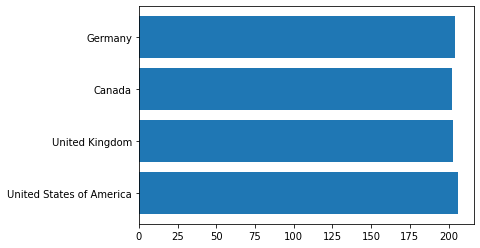

In [184]:
# Task 3
plt.barh(q13.country_name,q13.employee_id)

<BarContainer object of 106 artists>

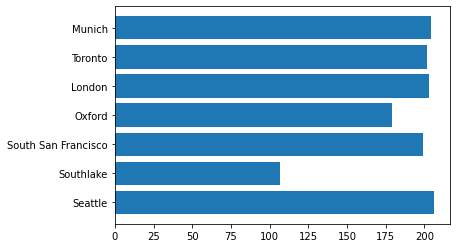

In [185]:
plt.barh(q13.city,q13.employee_id)